In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append("..")
import hydropt.hydropt as hd

In [280]:
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (8,4)

In [281]:
wbands_hs = np.arange(400,711, 5)

In [282]:
# initialize reflectance model: IOP -> Rrs
fwd_model = hd.PolynomialReflectance()

In [283]:
# load IOP dataset
ds = xr.load_dataset('./data/psc_rrs_iop.nc')

In [274]:
# apply forward model to total absorption and backscatter
rrs = xr.apply_ufunc(
    lambda x: fwd_model.forward(np.sum(x, axis=0)),
    ds.iops.groupby('no'),
    input_core_dims=[['comp', 'iop', 'wavelength']],
    output_core_dims=[['wavelength']])

In [275]:
ds['rrs'] = rrs

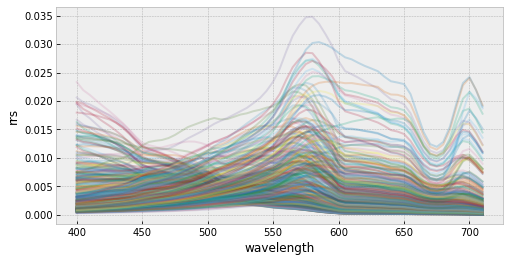

In [276]:
ds.rrs.plot.line(x='wavelength', add_legend=False, alpha=.2);

In [278]:
# save to netcdf
ds.to_netcdf('data/psc_rrs_iop.nc')